In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

0

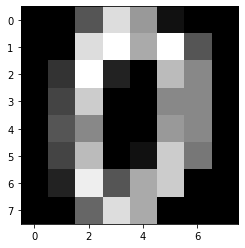

In [4]:
example = digits.data[0].reshape(8,8)
plt.imshow( example , cmap='gray', vmin=0) 

digits.target[0]

In [14]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
X = digits.data
y = digits.target
#X = StandardScaler().fit_transform(X)

## Steps 

- Feature engineering
- Train/Validation/Test splits
- Fit the model 
- Evaluate the model 

In [101]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


In [17]:
model = LogisticRegression(max_iter=100)
model.fit(  X_train, y_train )

LogisticRegression()

In [23]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [103]:
ret = model.predict(X_test)
accuracy_score( y_test, ret )

0.9694444444444444

## What happened here? 

- A warning is raised from the optimiser: **"STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."**
- original pixel values are in the range $ [0..16] $ 
- optimisation algorithms work best when the data have zero mean (and sometimes unit variance)
- so we will apply standard scaling to the input data $$ z = \frac{x - u}{  s } $$

where u is the mean of the training samples and s is the standard deviation of the training samples  

In [18]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

model.fit(  X_train, y_train )

LogisticRegression()

In [19]:
X[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [20]:
ret = model.predict(X_test)

In [22]:
accuracy_score( y_test, ret )

0.9722222222222222